# Instantiating a small convnet for dogs vs. cats classificationLicensed 

In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras import layers
from keras import models

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Configuring the model for training

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
train_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\train'
test_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\test'
validation_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\validation'

In [7]:
train_cats_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\train\\cats'
train_dogs_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\train\\dogs'

validation_cats_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\validation\\cats'
validation_dogs_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\validation\\dogs'

test_cats_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\test\\cats'
test_dogs_dir =  'C:\\Users\\Asus\\Documents\\Deep Learning\\dogs-vs-cats\\cats_and_dogs_small\\test\\dogs'

# Using ImageDataGenerator to read images from directories

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
#Rescales all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  #Targetdirectory
    target_size=(150, 150),  #Resizes all images to 150 × 150
    batch_size=20,
    class_mode='binary')  #Because you use binary_crossentropy loss, you need binary labels.

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [11]:
#pip install pillow


# Fitting the model using a batch generator

In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 7s 71ms/step - loss: 0.6887 - acc: 0.5390 - val_loss: 0.6901 - val_acc: 0.6260
Epoch 2/30
100/100 [==============================] - 4s 40ms/step - loss: 0.6519 - acc: 0.6205 - val_loss: 0.6274 - val_acc: 0.5700
Epoch 3/30
100/100 [==============================] - 4s 40ms/step - loss: 0.5955 - acc: 0.6820 - val_loss: 0.5309 - val_acc: 0.6530
Epoch 4/30
100/100 [==============================] - 4s 42ms/step - loss: 0.5603 - acc: 0.7090 - val_loss: 0.6470 - val_acc: 0.6690
Epoch 5/30
100/100 [==============================] - 4s 42ms/step - loss: 0.5311 - acc: 0.7320 - val_loss: 0.6790 - val_acc: 0.6570
Epoch 6/30
100/100 [==============================] - 4s 42ms/step - loss: 0.5023 - acc: 0.7485 - val_loss: 0.7433 - val_acc: 0.6720
Epoch 7/30
100/100 [==============================] - 4s 42ms/step - loss: 0.4605 - acc: 0.7800 - val_loss: 0.7808 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 4s 41ms/step - 

# Saving the model

In [13]:
model.save('cats_and_dogs_small_1.h5')

# Displaying curves of loss and accuracy during training

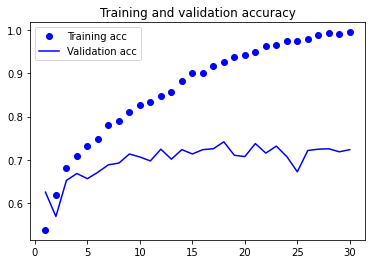

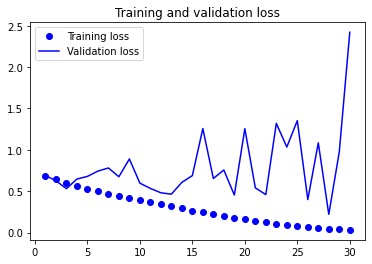

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Setting up a data augmentation configuration via ImageDataGenerator

In [16]:
 datagen = ImageDataGenerator(
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True,
     fill_mode='nearest')

# Displaying some randomly augmented training images

In [18]:
import os, shutil

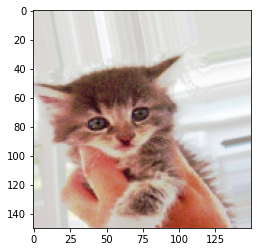

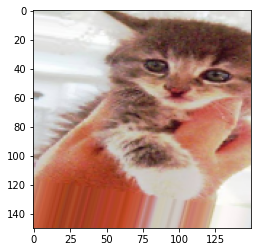

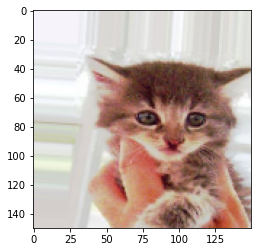

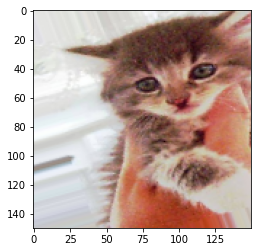

In [19]:
from keras.preprocessing import image  #Module with image-preprocessing utilities

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3] #Chooses one image to augment
img = image.load_img(img_path, target_size=(150, 150)) #Reads the image and resizes it

x = image.img_to_array(img) #Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  #Reshapes it to (1, 150, 150, 3)

#Generating batches of randomly transformed images.
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    # Loops indefinitely, so you need to break the loop at some point!
    if i%4==0:
        break
        
plt.show()

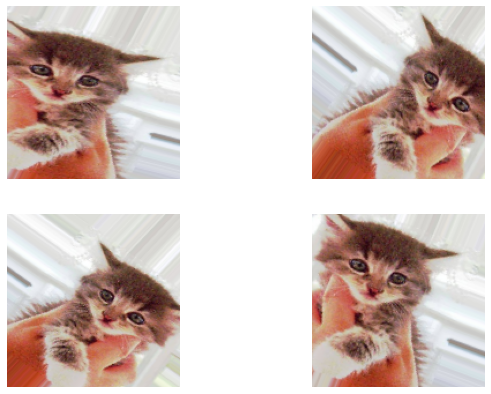

In [25]:
fig = plt.figure(figsize=(10, 7))
i=0
for batch in datagen.flow(x, batch_size=1):
    fig.add_subplot(2, 2, i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.axis('off')
    i+=1
    # Loops indefinitely, so you need to break the loop at some point!
    if i%4==0:
        break
        
plt.show()

# Defining a new convnet that includes dropout

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

# Training the convnet using data-augmentation generatorsNote 

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#validation data shouldn’t be augmented
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, #Targetdirectory
    target_size=(150, 150), #Resizes all images to 150 × 150
    batch_size=32,
    class_mode='binary') #binary_crossentropy loss needs binary labels

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6935 - acc: 0.5189 - val_loss: 0.7018 - val_acc: 0.5336
Epoch 2/100
100/100 [==============================] - 15s 152ms/step - loss: 0.6823 - acc: 0.5543 - val_loss: 0.6512 - val_acc: 0.5187
Epoch 3/100
100/100 [==============================] - 15s 150ms/step - loss: 0.6678 - acc: 0.5930 - val_loss: 0.5922 - val_acc: 0.6332
Epoch 4/100
100/100 [==============================] - 15s 152ms/step - loss: 0.6595 - acc: 0.6039 - val_loss: 0.6247 - val_acc: 0.6450
Epoch 5/100
100/100 [==============================] - 15s 148ms/step - loss: 0.6348 - acc: 0.6313 - val_loss: 0.5426 - val_acc: 0.6301
Epoch 6/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6159 - acc: 0.6572 - val_loss: 0.5833 - val_acc: 0.6939
Epoch 7/100
100/100 [==============================] - 15s 149ms/step - loss: 0.6057 - acc: 0.6652 -

100/100 [==============================] - 15s 150ms/step - loss: 0.4054 - acc: 0.8160 - val_loss: 0.3492 - val_acc: 0.7912
Epoch 61/100
100/100 [==============================] - 15s 154ms/step - loss: 0.3955 - acc: 0.8188 - val_loss: 0.5159 - val_acc: 0.7996
Epoch 62/100
100/100 [==============================] - 15s 152ms/step - loss: 0.3903 - acc: 0.8217 - val_loss: 0.2376 - val_acc: 0.8001
Epoch 63/100
100/100 [==============================] - 16s 156ms/step - loss: 0.4008 - acc: 0.8194 - val_loss: 0.3530 - val_acc: 0.8048
Epoch 64/100
100/100 [==============================] - 15s 150ms/step - loss: 0.3959 - acc: 0.8247 - val_loss: 0.3496 - val_acc: 0.7732
Epoch 65/100
100/100 [==============================] - 15s 152ms/step - loss: 0.4040 - acc: 0.8185 - val_loss: 0.3828 - val_acc: 0.8052
Epoch 66/100
100/100 [==============================] - 15s 152ms/step - loss: 0.3728 - acc: 0.8431 - val_loss: 0.4731 - val_acc: 0.8073
Epoch 67/100
100/100 [==============================] 

# Saving the model

In [30]:
model.save('cats_and_dogs_small_2.h5')

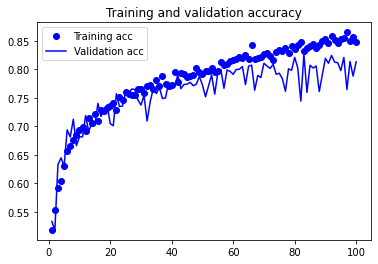

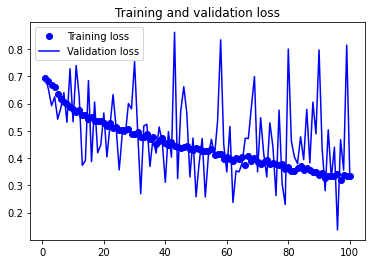

In [31]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()